# Assignment is below. 

In [1]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [2]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)

In [3]:
list(kobe.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

For now, use just the numerical datatypes. They are below as `num_columns`

In [4]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [5]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [6]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [7]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


In [8]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [9]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [10]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

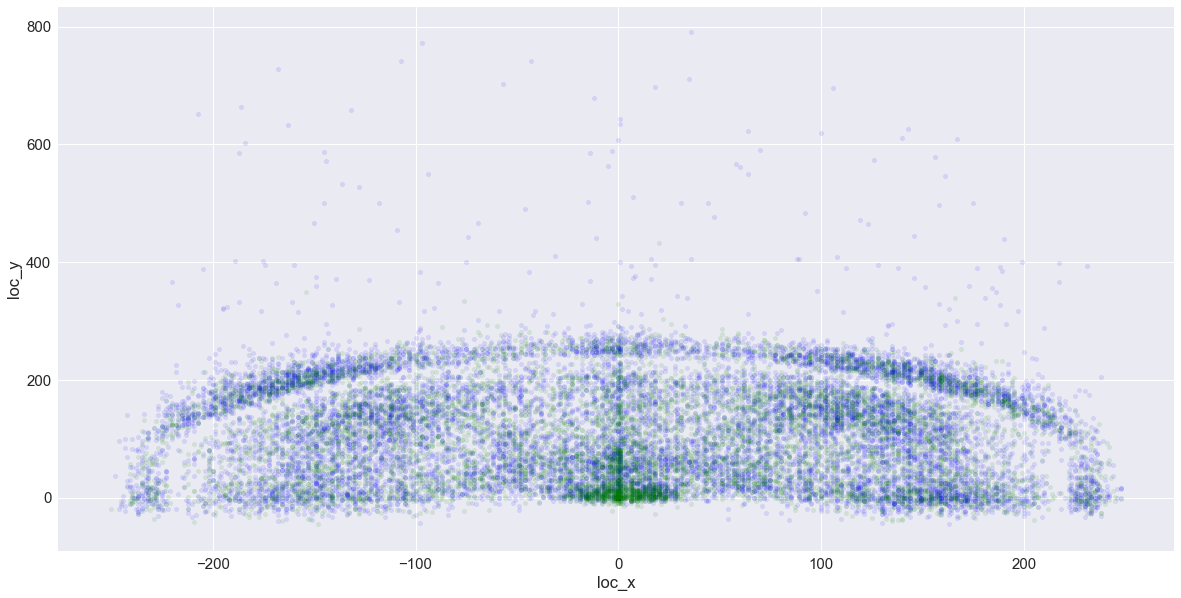

In [11]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

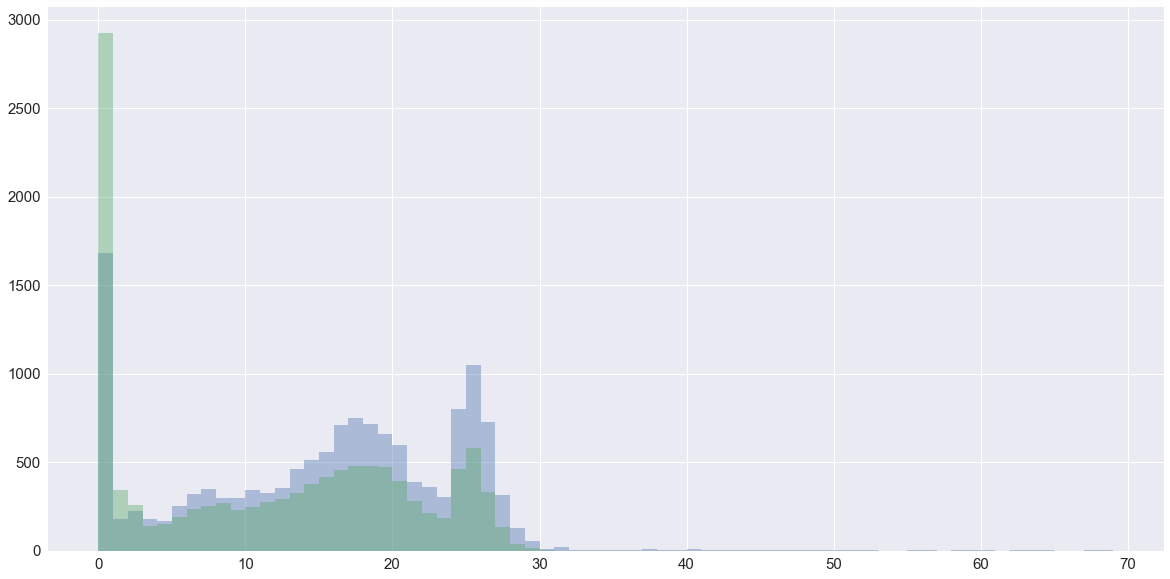

In [12]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

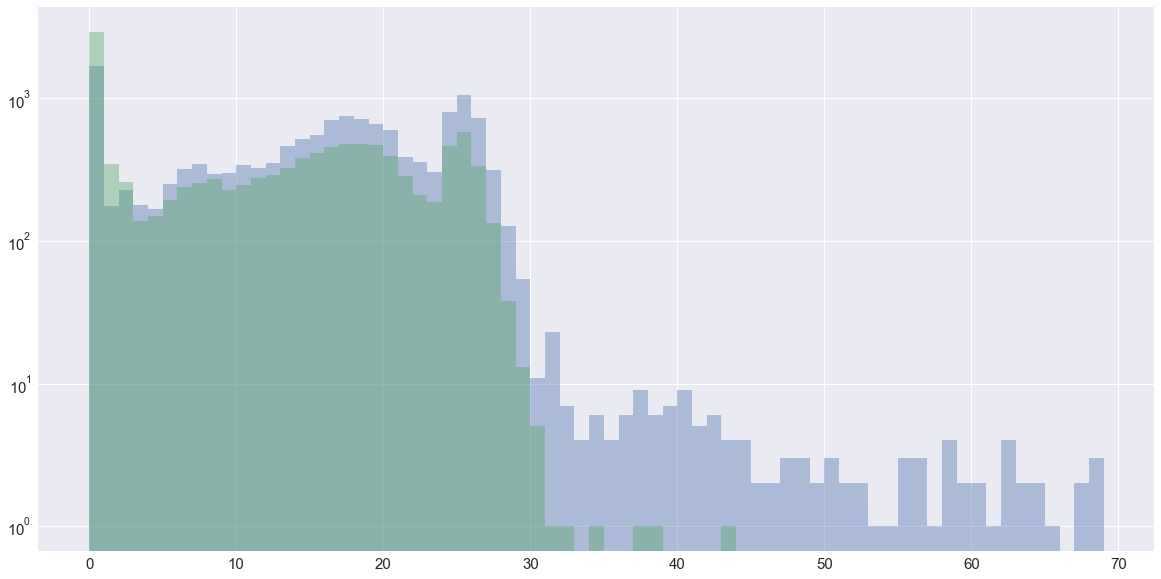

In [13]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

In [14]:
from sklearn.preprocessing import scale

In [15]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


0.59719033350196526

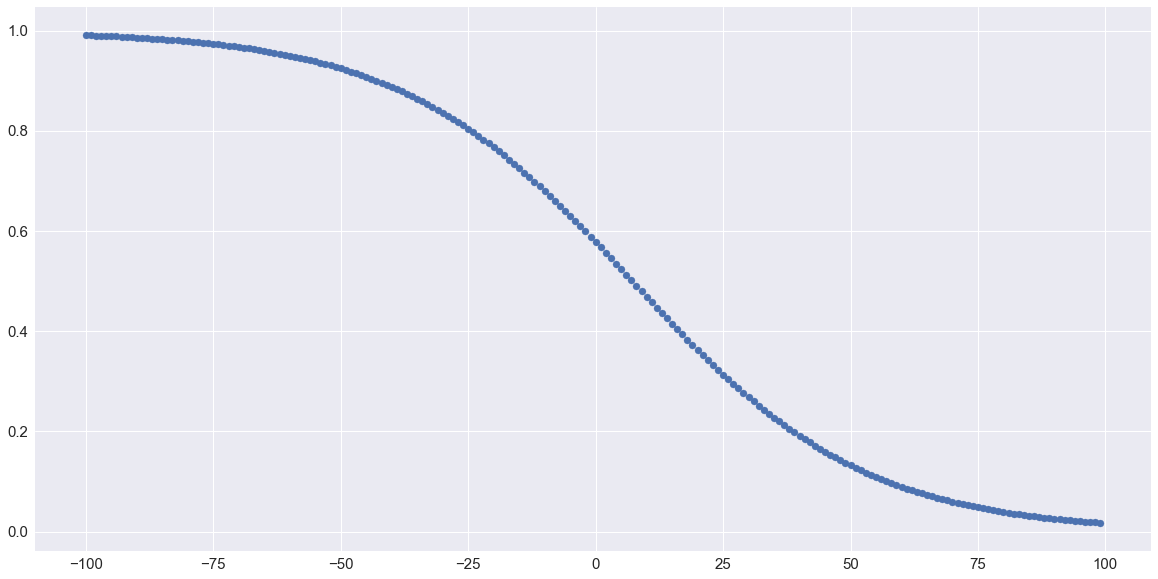

In [16]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])

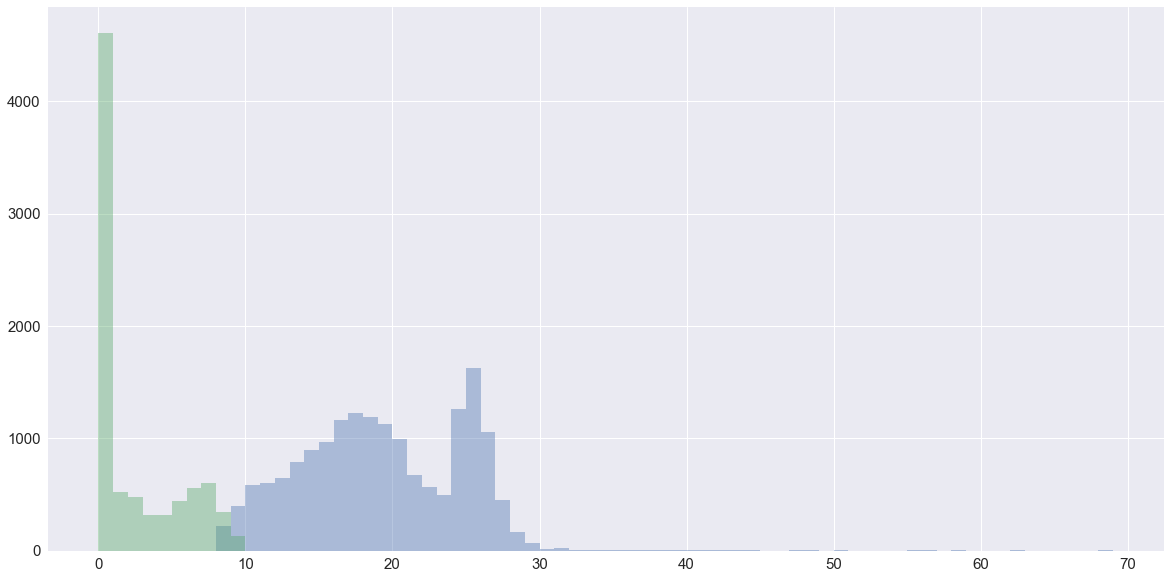

In [17]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

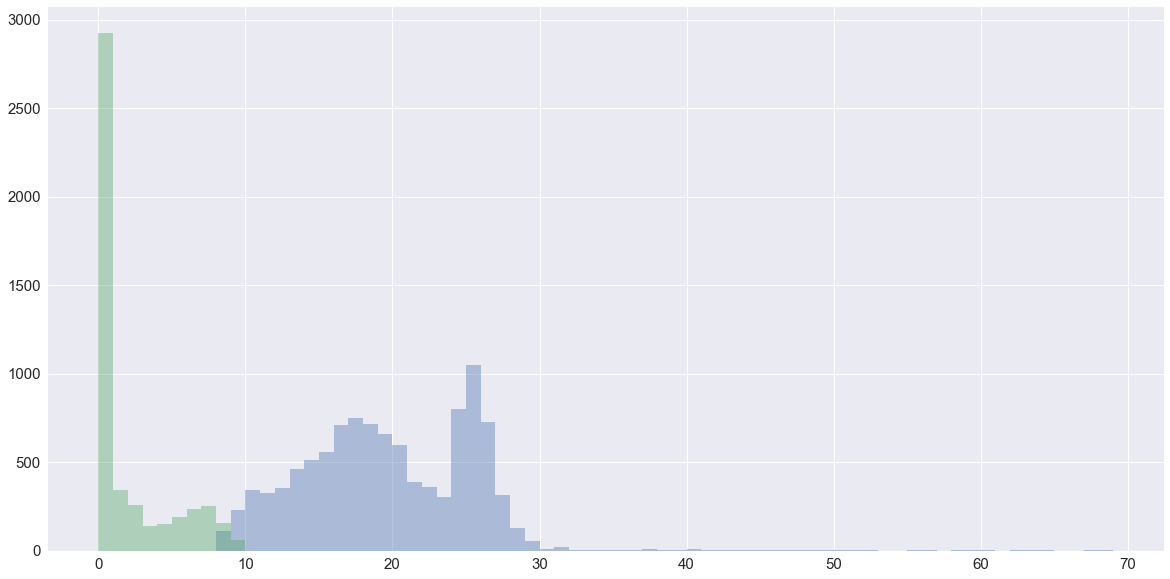

In [18]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

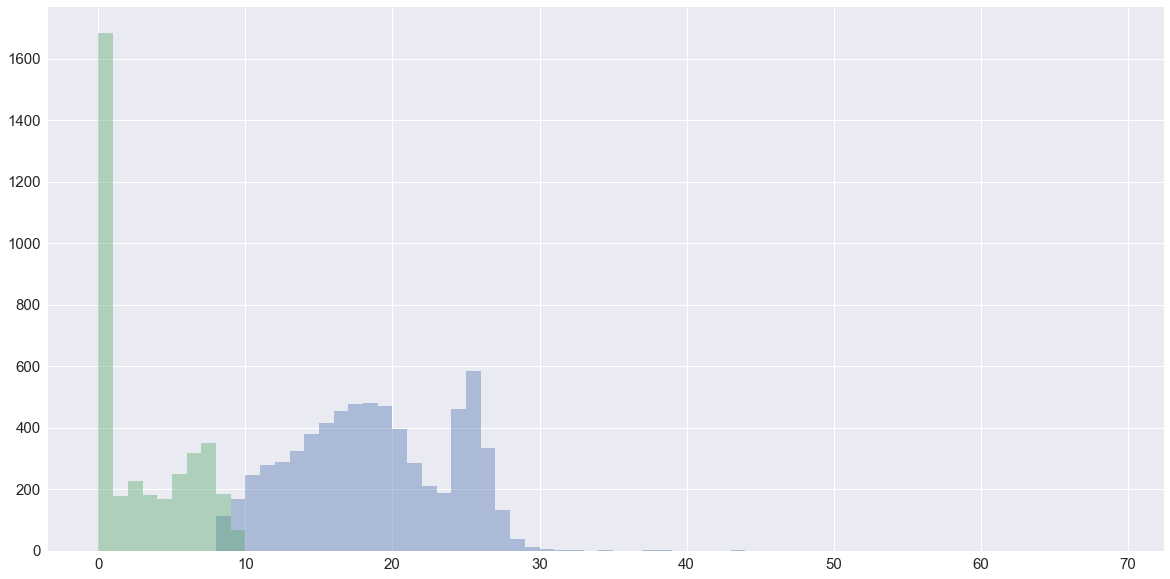

In [19]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

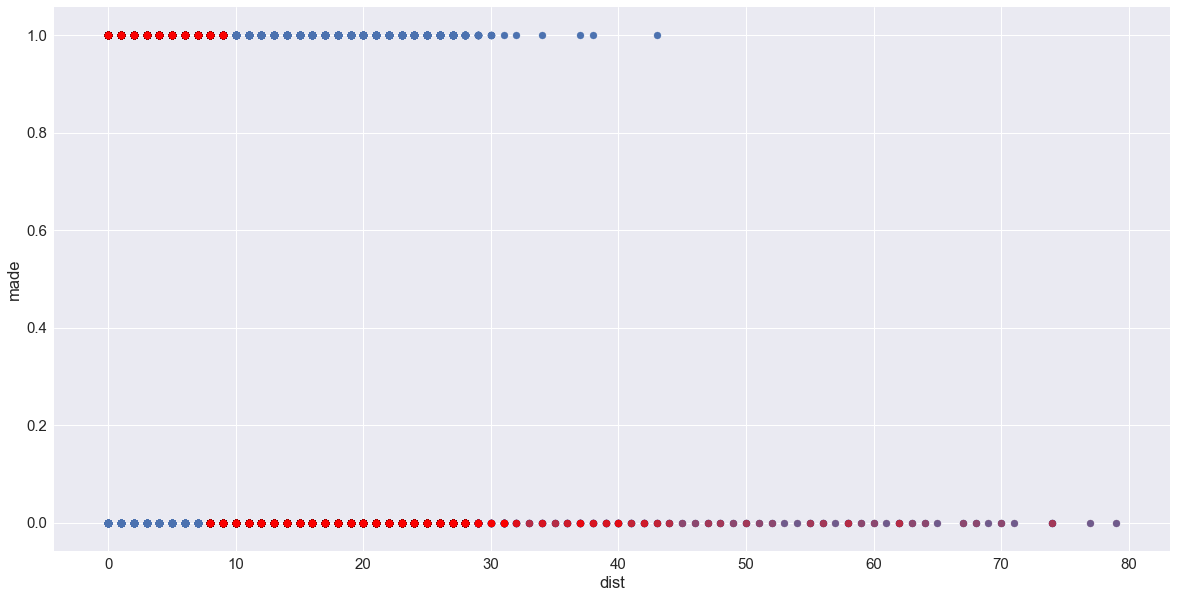

In [20]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

## The following is a reminder of how the SciKit-Learn Models can be interfaced

In [21]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.59237651,  0.59354337,  0.59299611,  0.59688716,  0.61750973,
        0.58388478,  0.60334761,  0.60918645,  0.60140132,  0.58388478])

# Assignment

## Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as:  Etc. The more naunced the more you'll have a feel for the data.

### Does Kobe make more shots in the 4th quarter than on average? 

In [22]:
kobe.head()
# kobe.shot_made_flag

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0


In [23]:
kobe.groupby(kobe['period']).count()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,playoffs,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred
period,,,,,,,,,,,,,,,,,,,,,
1,6700,6700,6700,6700,6700,6700,6700,6700,6700,6700,...,6700,6700,6700,6700,6700,6700,6700,6700,6700,6700
2,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635,...,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635
3,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002,...,7002,7002,7002,7002,7002,7002,7002,7002,7002,7002
4,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043,...,6043,6043,6043,6043,6043,6043,6043,6043,6043,6043
5,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
6,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [24]:
# Not helpful

kobe.groupby(kobe['period']).mean()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,pred
period,,,,,,,,,,,,,,
1,56.654179,2.462905e+07,33.956374,10.682537,87.925970,-118.259117,5.226418,0.143731,28.238806,13.004179,0.465672,1.610613e+09,15333.401194,0.329851
2,191.615439,2.500219e+07,33.955372,10.081988,88.928305,-118.259718,4.282165,0.150488,27.801597,13.222538,0.448802,1.610613e+09,15496.874712,0.333807
3,304.971008,2.443271e+07,33.954045,5.450443,90.255356,-118.264350,5.404027,0.139103,28.656098,13.268209,0.453442,1.610613e+09,15094.836904,0.337903
4,437.864471,2.500700e+07,33.946389,3.267913,97.910640,-118.266532,4.644216,0.154228,28.590270,14.391196,0.413702,1.610613e+09,15505.394175,0.293232
5,518.817857,2.455019e+07,33.948189,-8.400000,96.110714,-118.278200,1.671429,0.146429,26.610714,13.457143,0.442857,1.610613e+09,14128.264286,0.303571
6,572.866667,2.181730e+07,33.932667,0.533333,111.633333,-118.269267,1.500000,0.000000,22.733333,14.366667,0.466667,1.610613e+09,12349.566667,0.333333
7,614.285714,2.088659e+07,33.912443,-38.285714,131.857143,-118.308086,1.714286,0.000000,15.142857,14.428571,0.428571,1.610613e+09,15669.000000,0.285714


In [25]:
# Assuming periods are quarters, and 5,6,7 are overtime periods considering the lower numbers
shots_per_quarter = kobe.period.value_counts()
shots_per_quarter

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

In [26]:
shots_made_per_quarter = kobe[kobe.shot_made_flag == 1.0]
shots_made_per_quarter

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7,1.0
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9,0.0
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12,0.0
12,Running Jump Shot,Jump Shot,27,20000019,33.9343,-67,110,-118.3368,7,1,...,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,13,0.0
17,Jump Shot,Jump Shot,138,20000019,33.8183,-117,226,-118.3868,8,2,...,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,18,0.0
22,Running Jump Shot,Jump Shot,274,20000019,33.9343,-16,110,-118.2858,7,3,...,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,23,0.0
23,Running Jump Shot,Jump Shot,299,20000019,33.8943,-109,150,-118.3788,5,3,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,24,0.0
24,Running Jump Shot,Jump Shot,307,20000019,33.9813,-46,63,-118.3158,5,3,...,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,25,1.0


In [27]:
shots_made_per_quarter = shots_made_per_quarter.period.value_counts()
shots_made_per_quarter

3    3175
1    3120
2    2529
4    2500
5     124
6      14
7       3
Name: period, dtype: int64

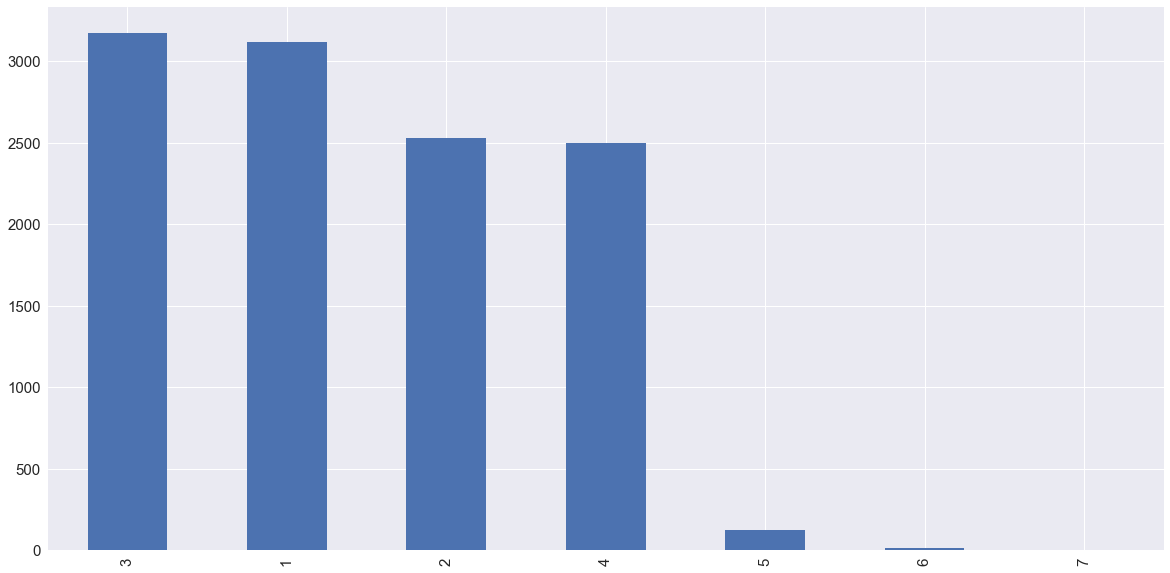

In [28]:
shots_made_per_quarter.plot(kind='bar')

#### Kobe makes more shots in the 3rd and 1st quarters than the 2nd and 4th quarters.

In [29]:
# Omitting overtimes
shots_made_per_quarter[:4].mean()

2831.0

#### On average, Kobe makes 2831 shots per quarter, but Kobe made only 2500 shots in the 4th quarter. So no, Kobe does not make more shots in the 4th quarter than on average.

### Does Kobe make more shots from the left more than the right? 

In [30]:
shot_areas = kobe.shot_zone_area.value_counts()
shot_areas

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [31]:
shots_made_areas = kobe[kobe.shot_made_flag == 1.0]
shots_made_areas.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7,1.0
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9,0.0
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12,0.0


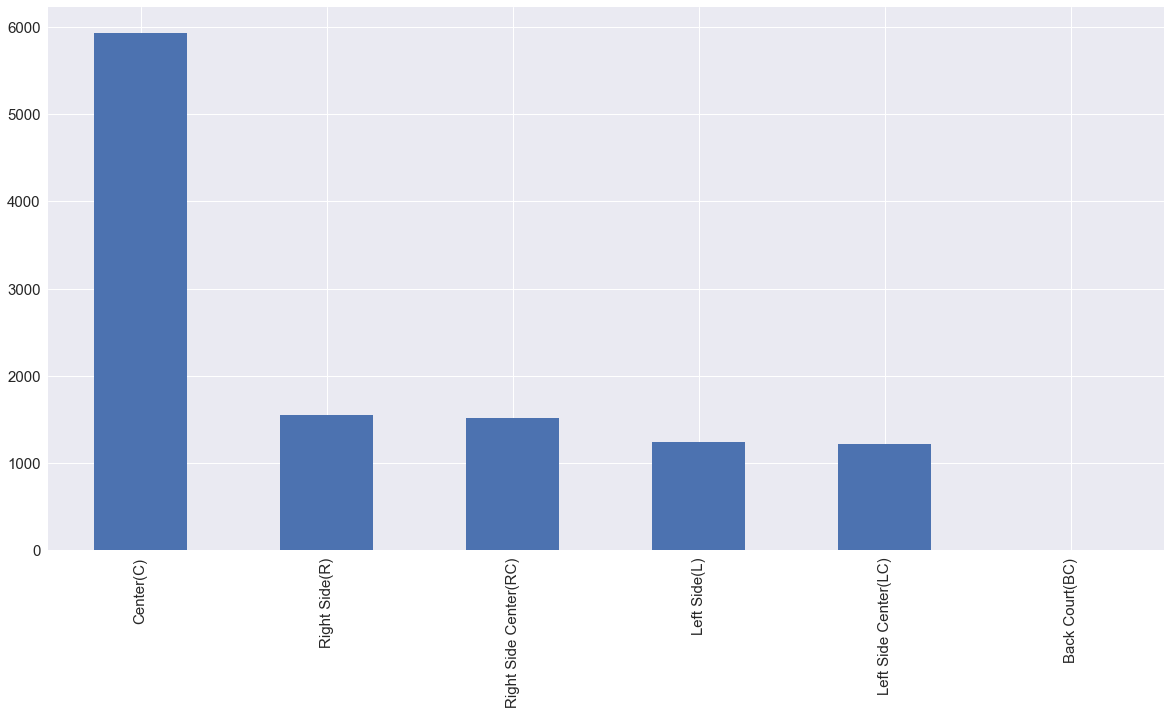

In [32]:
shots_made_areas = shots_made_areas.shot_zone_area.value_counts()
shots_made_areas.plot(kind='bar')

In [35]:
shots_made_areas = kobe[kobe.shot_made_flag == 1.0]
# shots_made_areas.head()

shots_made_areas.shot_zone_area.value_counts(normalize=True)

Center(C)                0.517488
Right Side(R)            0.135194
Right Side Center(RC)    0.132839
Left Side(L)             0.108417
Left Side Center(LC)     0.105975
Back Court(BC)           0.000087
Name: shot_zone_area, dtype: float64

#### Kobe makes over 50% of shots from the center. Kobe also makes about 26% shots from the right side and 21% from the left side, so right side wins out.

### What was Kobe's best year for shooting percentage?

In [36]:
kobe.head()
# kobe['game_date'].value_counts()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0


In [22]:
# Add year column
kobe['game_year'] = kobe['game_date'].str[:4]
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,pred,game_year
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,0.0,2000
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,0.0,2000
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,0.0,2000
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,1.0,2000
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,0.0,2000


In [23]:
# sum number of shots made

total_shots_made = kobe[kobe['shot_made_flag'] == 1.0]
# total_shots_made = total_shots_made.groupby
# total_shots_made = total_shots_made.game_year.value_counts(sort=True)
# total_shots_made

total_shots_made = total_shots_made.groupby('game_year').size()
total_shots_made

game_year
1996     26
1997    269
1998    216
1999    453
2000    809
2001    646
2002    822
2003    695
2004    646
2005    568
2006    825
2007    733
2008    858
2009    924
2010    744
2011    480
2012    815
2013    381
2014    199
2015    172
2016    184
dtype: int64

In [24]:
# sum number of shots made and missed
# total_shots_made = kobe.groupby(['game_year']).sum()
# total_shots = kobe.game_year.value_counts(sort=True)
# total_shots

total_shots = kobe.groupby('game_year').size()
total_shots

game_year
1996      69
1997     625
1998     499
1999     983
2000    1716
2001    1397
2002    1860
2003    1608
2004    1506
2005    1267
2006    1763
2007    1628
2008    1799
2009    1973
2010    1693
2011    1071
2012    1866
2013     849
2014     524
2015     493
2016     508
dtype: int64

In [25]:
# divide sums
shoot_perc = (total_shots_made/total_shots)*100
shoot_perc

game_year
1996    37.681159
1997    43.040000
1998    43.286573
1999    46.083418
2000    47.144522
2001    46.241947
2002    44.193548
2003    43.221393
2004    42.895086
2005    44.830308
2006    46.795235
2007    45.024570
2008    47.693163
2009    46.832235
2010    43.945659
2011    44.817927
2012    43.676313
2013    44.876325
2014    37.977099
2015    34.888438
2016    36.220472
dtype: float64

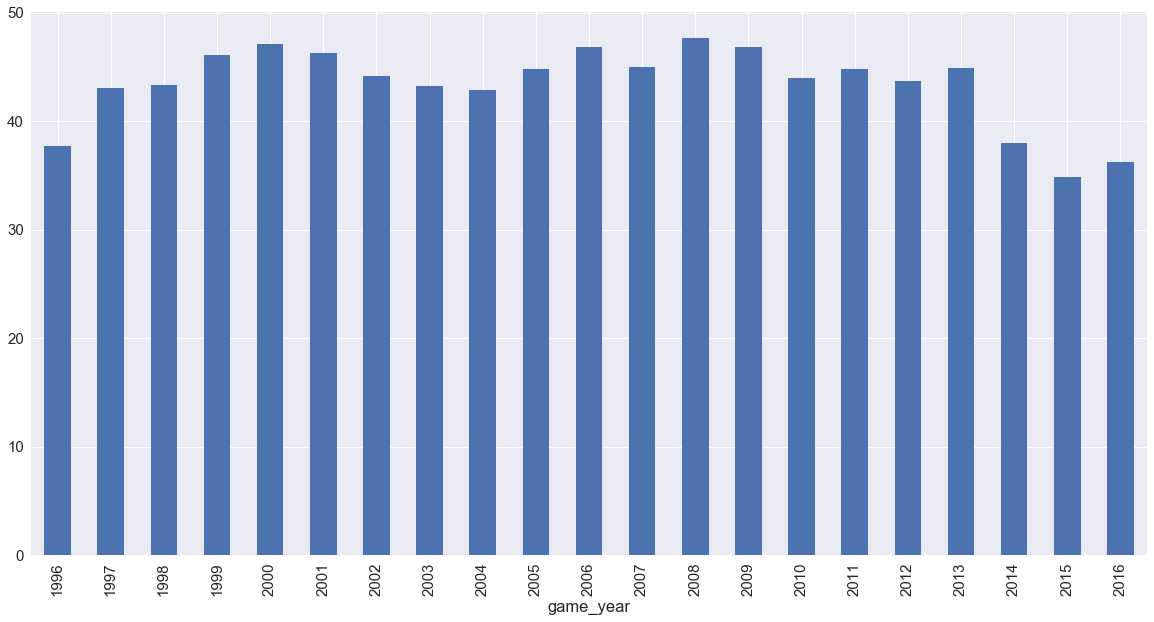

In [26]:
shoot_perc.plot(kind='bar')

In [27]:
shoot_perc.sort_values()

game_year
2015    34.888438
2016    36.220472
1996    37.681159
2014    37.977099
2004    42.895086
1997    43.040000
2003    43.221393
1998    43.286573
2012    43.676313
2010    43.945659
2002    44.193548
2011    44.817927
2005    44.830308
2013    44.876325
2007    45.024570
1999    46.083418
2001    46.241947
2006    46.795235
2009    46.832235
2000    47.144522
2008    47.693163
dtype: float64

### 2008 was Kobe's best year, making almost 48% of shots. 2015 was his worst, making only 35% of shots.

### 1. Create a new column called `abs_x` that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of `loc_x`.

In [38]:
kobe['abs_x'] = kobe['loc_x'].abs()
# kobe.head()
kobe.loc_x[:5], kobe.abs_x[:5]

(1   -157
 2   -101
 3    138
 4      0
 5   -145
 Name: loc_x, dtype: int64, 1    157
 2    101
 3    138
 4      0
 5    145
 Name: abs_x, dtype: int64)

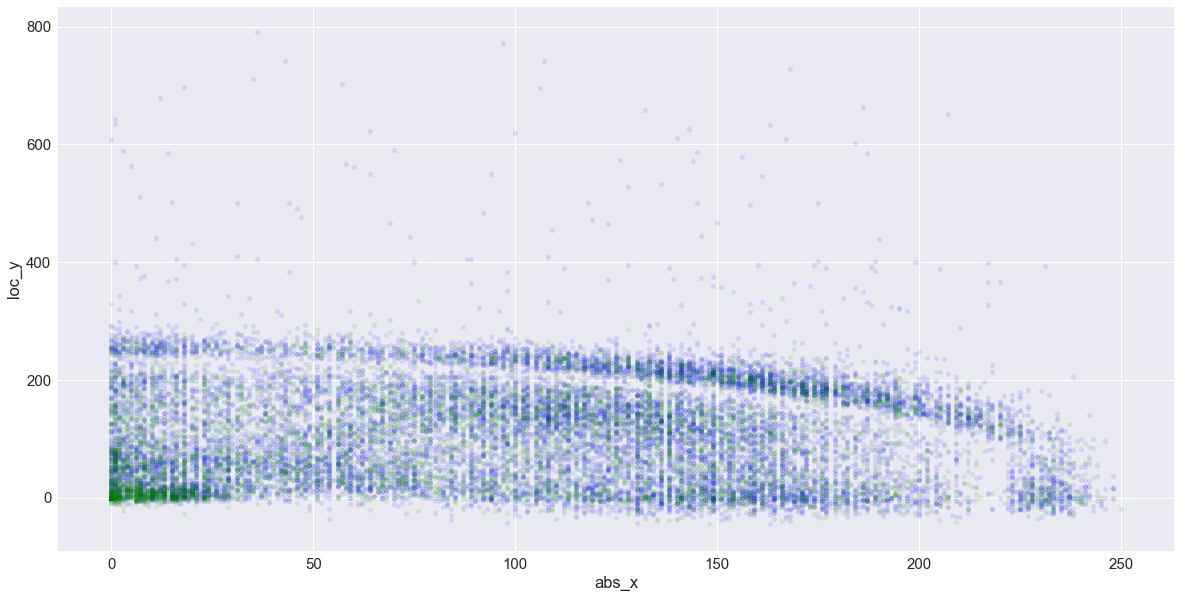

In [39]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='abs_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='abs_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

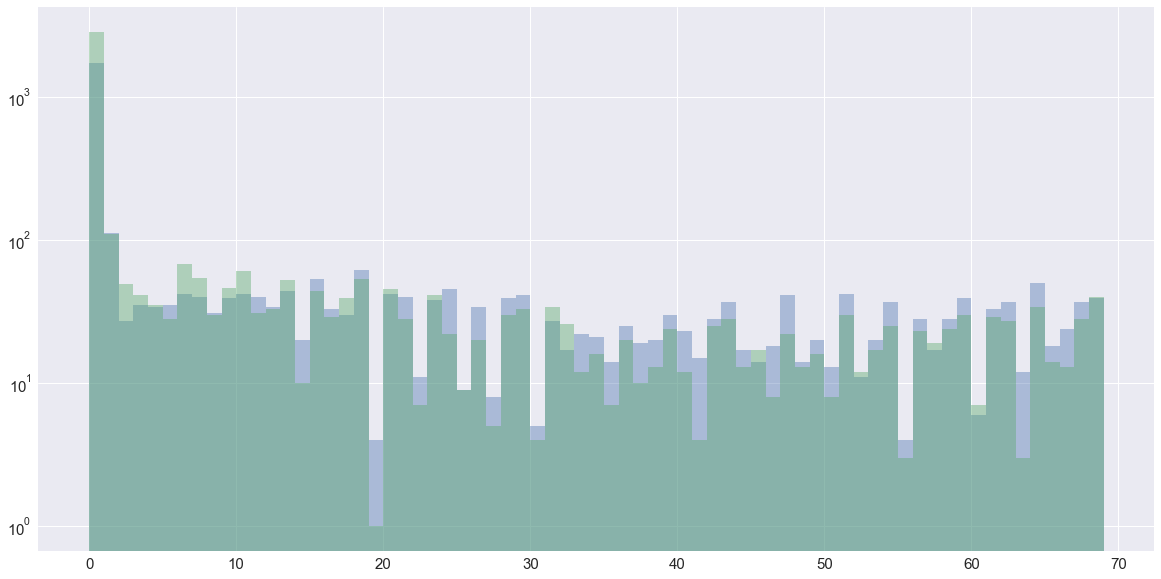

In [40]:
kobe[kobe.shot_made_flag==0].loc_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].loc_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

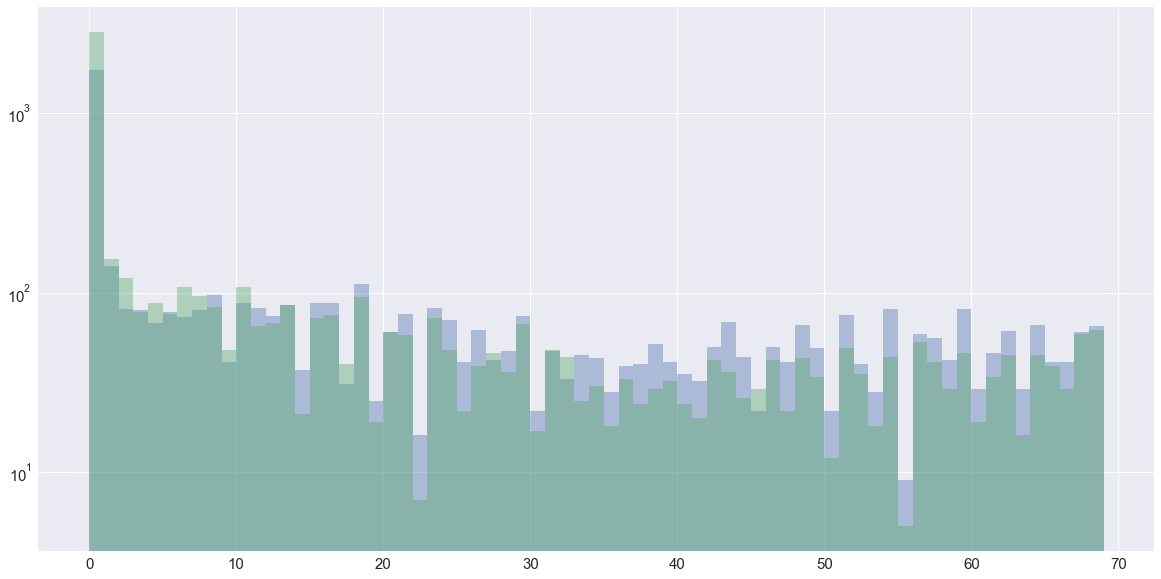

In [41]:
kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

### By essentially folding the basketball court in half, a richer dataset can be realized. This is achieved by converting negative loc_x values to positive values, giving you double the positive values for the same y-values. Win-win. Since Abs_x contains richer data, using this variable should naturally generate a more accurate model. Let's test that theory.

In [42]:
# fit a linear regression model and store the predictions
feature_cols = ['loc_x']
X = kobe[feature_cols]
y = kobe.shot_made_flag

# Run logistic regression model
model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.55383896952951706

In [43]:
# fit a linear regression model and store the predictions
feature_cols = ['abs_x']
X = kobe[feature_cols]
y = kobe.shot_made_flag

# Run logistic regression model
model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.5925983577849554

### This confirms the theory with 59% model accuracy using abs_x values compared with 55% accuracy using loc_x values.

### 2.  Convert several (including ` ` ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

In [44]:
kobe.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'pred', 'abs_x'],
      dtype='object')

In [45]:
# get all non-numeric columns for conversion

str_columns = kobe.columns[kobe.dtypes==np.object]
# str_columns = kobe.columns[kobe.dtypes==np.object]&(kobe.columns!='pred')

list(str_columns)

['action_type',
 'combined_shot_type',
 'season',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_name',
 'game_date',
 'matchup',
 'opponent']

In [46]:
# create new columns of categorized values
for str_column in str_columns:
#     column names
    tag = str_column + '_num'
#     assign category codes
    kobe[tag] = kobe[str_column].astype('category').cat.codes
    
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,combined_shot_type_num,season_num,shot_type_num,shot_zone_area_num,shot_zone_basic_num,shot_zone_range_num,team_name_num,game_date_num,matchup_num,opponent_num
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,3,4,0,3,4,2,0,309,28,25
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,3,4,0,2,4,0,0,309,28,25
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,3,4,0,4,4,0,0,309,28,25
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,1,4,0,1,5,4,0,309,28,25
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,3,4,0,3,4,2,0,309,28,25


In [47]:
# Remove game_id, event_id, and 'pred'
list(kobe.columns[(kobe.dtypes!=np.object)&(kobe.columns!='pred')][2:]) 

['lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id',
 'abs_x',
 'action_type_num',
 'combined_shot_type_num',
 'season_num',
 'shot_type_num',
 'shot_zone_area_num',
 'shot_zone_basic_num',
 'shot_zone_range_num',
 'team_name_num',
 'game_date_num',
 'matchup_num',
 'opponent_num']

In [48]:
# kobe.columns
# kobe.dtypes
# kobe.columns[kobe.dtypes!=np.object]

# Remove game_id, event_id, and 'pred'
list(kobe.columns[(kobe.dtypes!=np.object)&(kobe.columns!='pred')][2:]) 
num_cols = list(kobe.columns[(kobe.dtypes!=np.object)&(kobe.columns!='pred')][2:]) 
num_cols = num_cols[12:]
num_cols

['abs_x',
 'action_type_num',
 'combined_shot_type_num',
 'season_num',
 'shot_type_num',
 'shot_zone_area_num',
 'shot_zone_basic_num',
 'shot_zone_range_num',
 'team_name_num',
 'game_date_num',
 'matchup_num',
 'opponent_num']

### Histograms for numerical features

In [49]:
# Sample histogram

# kobe.shot_zone_area_num.value_counts()

len(kobe.shot_zone_area_num.value_counts())

6

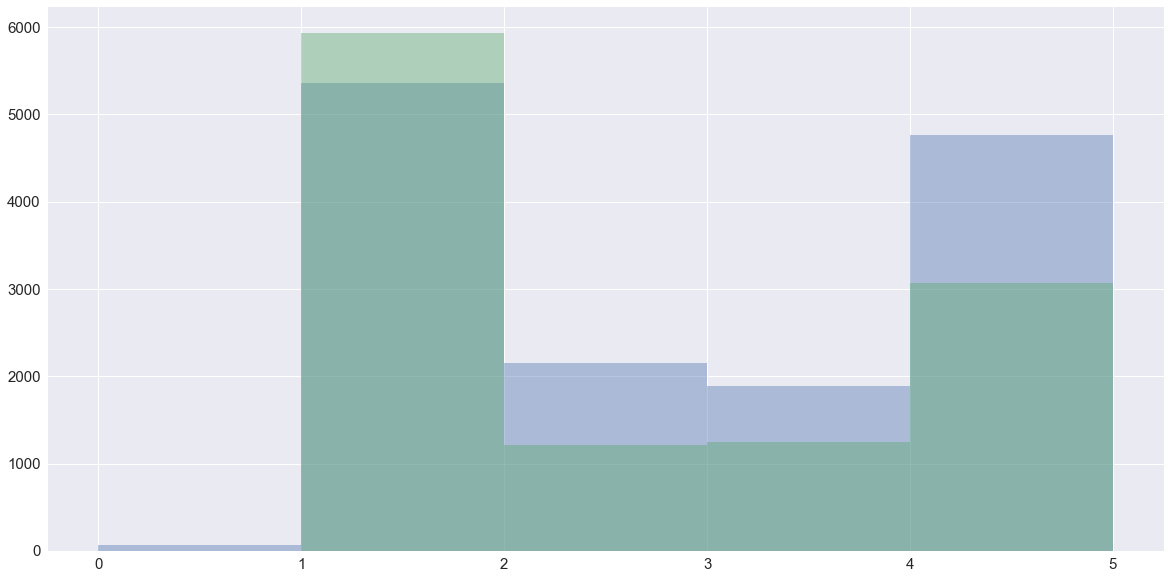

In [50]:
kobe[kobe.shot_made_flag==0].shot_zone_area_num.hist(bins=np.arange(0,6,1), alpha=.4, log=False)
kobe[kobe.shot_made_flag==1].shot_zone_area_num.hist(bins=np.arange(0,6,1), alpha=.4, log=False)

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


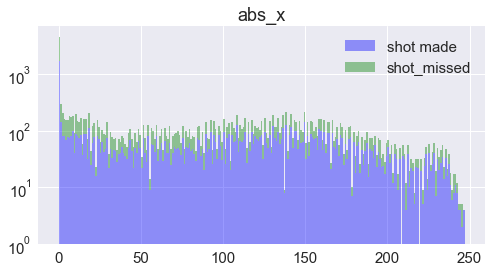

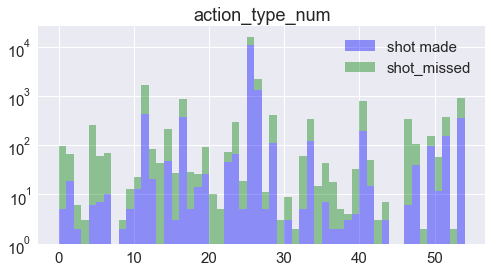

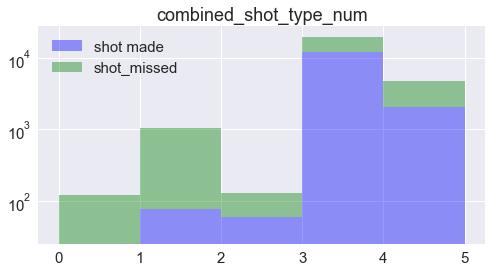

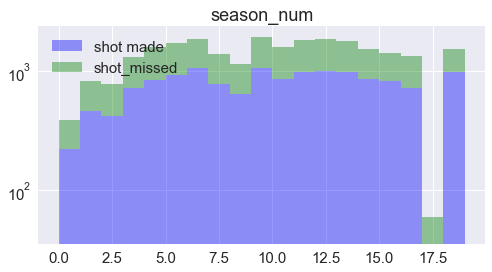

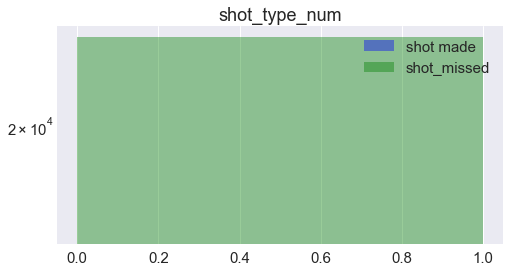

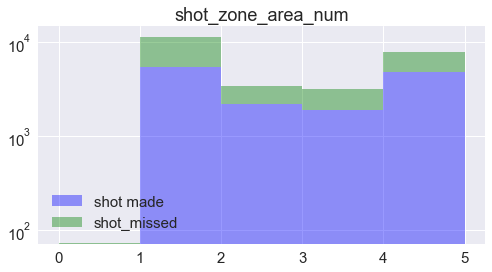

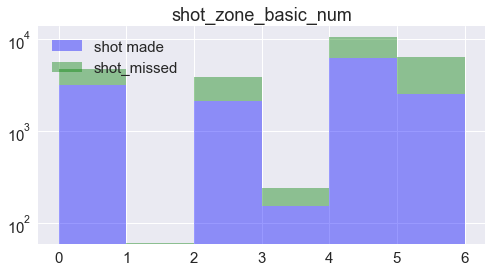

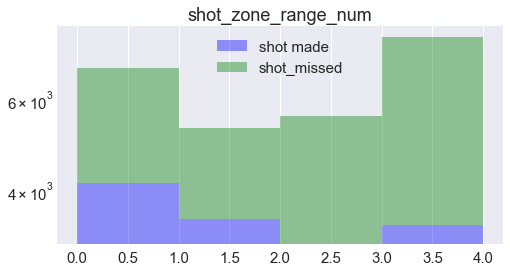

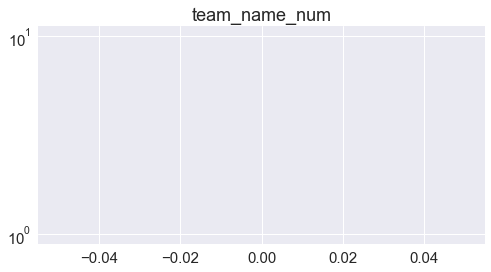

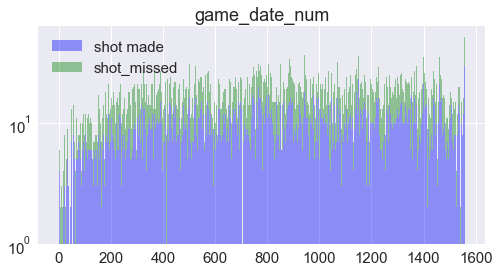

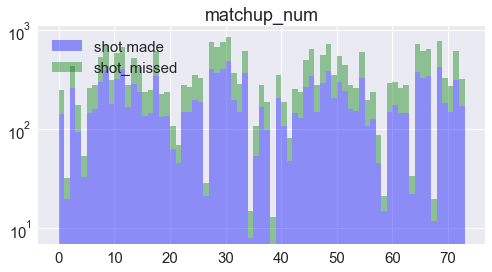

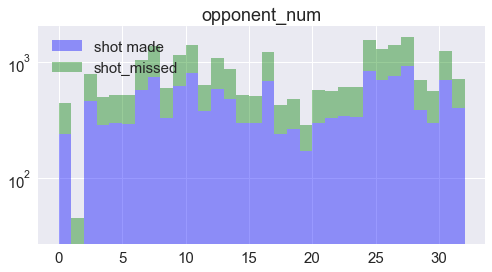

In [51]:
# For loop for histogram plots of numerical variables

for num_col in num_cols:
    plt.figure(figsize=(8,4))
    plt.title(num_col)
    
#     get number of values in variable
    num__col_len = len(kobe[num_col].value_counts())
#     kobe[kobe.shot_made_flag==0][num_col].hist(bins=np.arange(0,num__col_len,1), alpha=.4, log=True, color='blue')
#     kobe[kobe.shot_made_flag==1][num_col].hist(bins=np.arange(0,num__col_len,1), alpha=.4, log=True, color='green')
    plt.hist([kobe.loc[kobe.shot_made_flag==0, num_col],
              kobe.loc[kobe.shot_made_flag==1, num_col]],
             bins=np.arange(0,num__col_len,1), 
             color=['b', 'g'],
             label=['shot made',
                    'shot_missed'],
             stacked=True, alpha=0.4, log=True)
    plt.legend()


#### See above plots for reference.
##### action_type_num: 
this new variable may provide insight on which action types lead to the most successful throws. For example, we can see that the highest number of jump shots come from action_type_num,25. That said, slightly more jump shots are missed than made. 

##### combined_shot_type_num: 
similar to action_type_num, the most successful combined_shot_type_num may provide insight into which combined shots are made compared with those missed. The combined_shot_type_num '1' is made the most and missed the least, and not surprisingly is the dunk shot. There may also be some multicollinearity with action_type_num since they represent the same data aggregated in a different way.

##### season_num
some seasons are better than others. the makeup of the team can vary from season to season which may also influence this number. season_num 10 experienced the highest number of both successful and attempted shots. Kobe played less his first season compared with every subsequent season, except season 17. Maybe he had an injury? That season seems like an outlier.

##### shot_type_num
Clearly, 3-point shots are very difficult to make.

##### shot_zone_area_num
The shot_zone_area_num 0 experiences significantly more misses than made shots compared with the other shot_zone_area_nums. The proximity of the area may influence the ability of a shot to be made, which would influence the model.

##### shot_zone_basic_num
This is another representation of the area in the basketball court the shot was made. Shots attempted in shot_zone_basic_num '5' appear to be made more than missed, which is not the case every other basic zone area. There may also be some multicollinearity between this variable and shot_zone_area_num

##### shot_zone_range_num
In range 3-4, more shots are made than missed compared with every other zone range. Again some multicollinearity might exist here when using along with other zone variables.

##### team_name_num
This variable is not useful since we already have team_id.

##### game_date_num
This variable is not useful in and of itself. Perhaps a 'month' or 'day of week' variable derived would be, though.

##### matchup_num
This variable may provides the information of whether this was a 'home' game or not and could contribute 'home-team advantage' to the model adding another dimension. Or perhaps that might require a more direct derived variable.

##### opponent_num
Some teams are better than others and this variable captures this knowledge. Looks like Kobe only played BKN 45 times, so I wonder if this team was sold, had a name change or some thing along those lines.

In [52]:
# kobe[kobe['combined_shot_type_num']==1]
# kobe['season_num'].value_counts()
# kobe['shot_zone_area_num'].value_counts()
# kobe['shot_zone_basic_num'].value_counts()
# kobe['opponent'].value_counts()

# kobe.action_type_num.value_counts()
# kobe[kobe.shot_made_flag==1].action_type_num.value_counts()[:5]
# kobe[kobe.shot_zone_area_num==1]
# kobe.shot_zone_basic.value_counts()

# kobe[kobe['shot_zone_basic_num']==5]
# kobe.shot_zone_area.value_counts()

### Run the model with the new variables

In [53]:
from sklearn.preprocessing import scale

In [74]:
# fit a linear regression model and store the predictions
# remove game_event_id and game_id
feature_cols = kobe.columns[(kobe.dtypes!=np.object) & 
                            (kobe.columns !='shot_made_flag') &
                            (kobe.columns !='loc_x') &
                            (kobe.columns !='pred')][2:]
print(feature_cols)
# feature_cols = ['game_id', 'minutes_remaining']

X = kobe[feature_cols]
y = kobe.shot_made_flag

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y, test_size=0.1, random_state=0)

# Run logistic regression model

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
# kobe['pred'] = model.predict(X)

pred = model.predict(X_test)

print(np.max(pred), np.max(y_train),np.max(y_test) )


# from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

Index(['lat', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'seconds_remaining', 'shot_distance', 'team_id', 'shot_id', 'abs_x'],
      dtype='object')
1.0 1.0 1.0


0.59143968871595332

### Hm. Maybe categorizing the variables isn't the best way to convert columns to numeric. Let's try dummy variables.

In [55]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [75]:
kobe['abs_x'] = kobe['loc_x'].abs()
# kobe.head()
kobe.loc_x[:5], kobe.abs_x[:5]

(1   -157
 2   -101
 3    138
 4      0
 5   -145
 Name: loc_x, dtype: int64, 1    157
 2    101
 3    138
 4      0
 5    145
 Name: abs_x, dtype: int64)

In [76]:
# transform dummy columns

cols_to_transform = kobe.columns[(kobe.dtypes==np.object)]

cols_to_transform

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'game_date', 'matchup', 'opponent'],
      dtype='object')

In [77]:
kobe_dummies = pd.get_dummies(kobe,columns = cols_to_transform)
# kobe_dummies.head()
# kobe_dummies.shape
# # column names
# list(kobe_dummies.columns)
# # numeric columns subset
list(kobe_dummies.columns[kobe_dummies.dtypes!=np.object])

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id',
 'abs_x',
 'action_type_Alley Oop Dunk Shot',
 'action_type_Alley Oop Layup shot',
 'action_type_Cutting Layup Shot',
 'action_type_Driving Bank shot',
 'action_type_Driving Dunk Shot',
 'action_type_Driving Finger Roll Layup Shot',
 'action_type_Driving Finger Roll Shot',
 'action_type_Driving Floating Bank Jump Shot',
 'action_type_Driving Floating Jump Shot',
 'action_type_Driving Hook Shot',
 'action_type_Driving Jump shot',
 'action_type_Driving Layup Shot',
 'action_type_Driving Reverse Layup Shot',
 'action_type_Driving Slam Dunk Shot',
 'action_type_Dunk Shot',
 'action_type_Fadeaway Bank shot',
 'action_type_Fadeaway Jump Shot',
 'action_type_Finger Roll Layup Shot',
 'action_type_Finger Roll Shot',
 'action_type_Floating Jump shot',
 'action_type_Follow Up Dunk Shot',
 'action_type_Ho

In [79]:
# fit a linear regression model and store the predictions
# feature_cols = kobe_dummies.columns[kobe_dummies.dtypes!=np.object][2:]

feature_cols = kobe_dummies.columns[(kobe_dummies.dtypes!=np.object) &
                            (kobe_dummies.columns !='shot_made_flag') &
                            (kobe_dummies.columns !='loc_x') &
                            (kobe_dummies.columns !='pred')][2:]

print(feature_cols)

X = kobe_dummies[feature_cols]
y = kobe_dummies.shot_made_flag

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y, test_size=0.1, random_state=0)

# Run logistic regression model
model = Model()
model.fit(X_test, y_test)
# kobe_dummies['pred'] = model.predict(X)
pred = model.predict(X_test)

# from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

Index(['lat', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'seconds_remaining', 'shot_distance', 'team_id', 'shot_id',
       ...
       'opponent_PHI', 'opponent_PHX', 'opponent_POR', 'opponent_SAC',
       'opponent_SAS', 'opponent_SEA', 'opponent_TOR', 'opponent_UTA',
       'opponent_VAN', 'opponent_WAS'],
      dtype='object', length=1778)


0.85291828793774316

### After scaling the dataset and using get_dummies, we saw a 25% increase in accuracy. This seems to be the optimal way to convert string columns to features. That said, some variables may still offer more knowledge as ordinal variables and it might be useful to compare each feature's individual contribution to a model as ordinal versus dummy variables.

### This model included all the features, even ones that may not contribute much to the model. So I removed them below to produce a more efficient model. It's worth noting some multicollinearity may be influencing this model. 

### I also found that substituting abs_x for loc_x had much less of an impact using get_dummies(), which indicates that the benefits realized in one method may not necessarily apply to all methods. 

In [59]:
kobe = pd.read_csv('../data/kobe.csv')
kobe.dropna(inplace=True)
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [60]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [61]:
cols_to_transform = kobe.columns[(kobe.dtypes==np.object) &
                    (kobe.columns != 'game_id') &
                    (kobe.columns != 'game_event_id') &
                    (kobe.columns != 'game_date') &
                    (kobe.columns != 'team_name') &
                    (kobe.columns != 'shot_id') ]
cols_to_transform

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'matchup',
       'opponent'],
      dtype='object')

In [62]:
kobe_dummies = pd.get_dummies(kobe,columns = cols_to_transform)
# kobe_dummies.head()
kobe_dummies.shape
# kobe_dummies.dtypes

(25697, 224)

In [63]:
kobe_dummies['abs_x'] = kobe_dummies['loc_x'].abs()
# kobe_dummies.head()
# kobe_dummies.loc_x[:5], kobe_dummies.abs_x[:5]

In [64]:
# %%timeit 
# fit a linear regression model and store the predictions
# feature_cols = kobe_dummies.columns[kobe_dummies.dtypes!=np.object][2:]

feature_cols = kobe_dummies.columns[(kobe_dummies.dtypes!=np.object) &
                            (kobe_dummies.columns !='shot_made_flag') &
                            (kobe_dummies.columns !='loc_x') &
#                             (kobe_dummies.columns !='shot_id') &
                            (kobe_dummies.columns !='pred')][2:]

print(feature_cols)

X = kobe_dummies[feature_cols]
y = kobe_dummies.shot_made_flag

# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y, test_size=0.1, random_state=0)

# Run logistic regression model
model = Model()
model.fit(X_test, y_test)
# kobe_dummies['pred'] = model.predict(X_test)
y_pred = model.predict(X_test)

# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

Index(['lat', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'seconds_remaining', 'shot_distance', 'team_id', 'shot_id',
       ...
       'opponent_PHX', 'opponent_POR', 'opponent_SAC', 'opponent_SAS',
       'opponent_SEA', 'opponent_TOR', 'opponent_UTA', 'opponent_VAN',
       'opponent_WAS', 'abs_x'],
      dtype='object', length=219)


0.69260700389105057

### Excluding game_date from the model results in a 15% decrease in model accuracy. Interesting. Perhaps Kobe's game improved over time and maybe even worsened after one or more peak points. That might be worth exploring.

### Excluding game_id, game_event_id, team_name, and shot_id did not influence the model and the accuracy was the same. 

### 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only `abs_x` and `loc_y`. The probabilities arise from a distributed grid of `x` values and `y` values as input to the `predict_proba()` function.

In [65]:
from sklearn.preprocessing import scale

In [67]:
kobe['abs_x'] = kobe['loc_x'].abs()
# kobe.head()
kobe.loc_x[:5], kobe.abs_x[:5]

(1   -157
 2   -101
 3    138
 4      0
 5   -145
 Name: loc_x, dtype: int64, 1    157
 2    101
 3    138
 4      0
 5    145
 Name: abs_x, dtype: int64)

In [68]:
# Testing data
feature_cols = ['abs_x', 'loc_y']
X = kobe[feature_cols]
y = kobe.shot_made_flag

# Split the dataset
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(scale(X), y, test_size=0.1, random_state=0)


# Run logistic regression model
model = Model()
model.fit(X_train, y_train)
pred_pro = model.predict_proba(X_test)


print(pred_pro)

[[ 0.69326761  0.30673239]
 [ 0.69475095  0.30524905]
 [ 0.50047967  0.49952033]
 ..., 
 [ 0.42080035  0.57919965]
 [ 0.48356714  0.51643286]
 [ 0.5989621   0.4010379 ]]


In [69]:
# pred_pro.shape, 
# X_test.dtype
X_test.shape

(2570, 2)

In [70]:
# graph
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

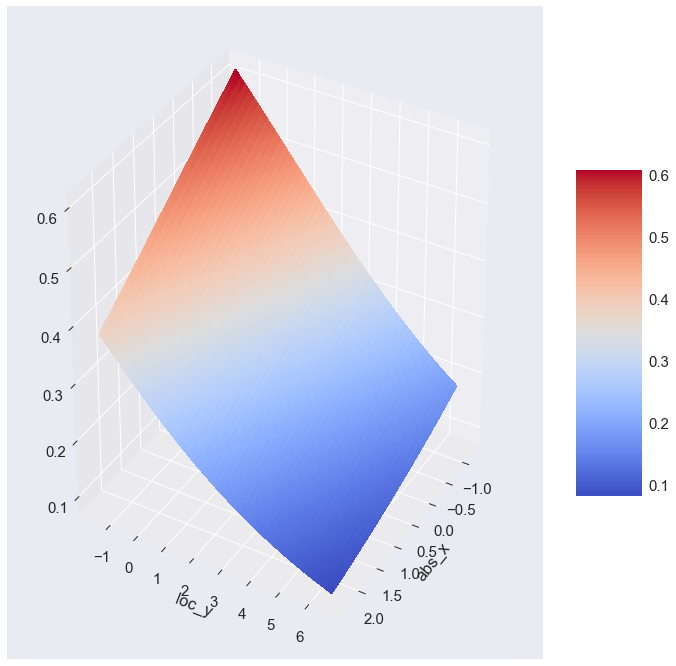

In [72]:
# plot the figure
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.view_init(30, 30)

# data
A = X_test[:, 0]
B = X_test[:, 1]
C = pred_pro[:,1]

# convert data to linear space for plotting
a = np.linspace(A.min(), A.max(), num=100)
b = np.linspace(B.min(), B.max(), num=100)
A,B = np.meshgrid(a,b)

# set up probabilities variable
c = np.hstack([A.reshape(-1,1),B.reshape(-1,1)])
C = model.predict_proba(c)[:,1]

# A.shape, B.shape, C.shape
C = C.reshape(100,100)

# plot the surface
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set(xlabel='abs_x', ylabel='loc_y')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

### So, this probability plot loosely resembles a quarter of a basketball court. The probability of Kobe making the basket increases as he approaches it. At the basket, there is about a 60% chance of Kobe making the shot.